# Chapter 2. Supervised Learning

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline

[Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) is used when we want to predict a certain outcome from a given input, and we have examples of input/output pairs.

## Classification and Regression

There are two major types of supervised machine learning problems, called [classification](https://en.wikipedia.org/wiki/Statistical_classification) and [regression](https://en.wikipedia.org/wiki/Regression_analysis).

In classification, the goal is to predit a *class label*, which is a choice from a predefined list of possibilities.  
In chapter 1 we used the example of classifying irises into one of three possible species.  
Classification is sometimes separated into *binary classification*, which is the special case of distinguishing between exactly two classes, and *multiclass classification*, which is classification between more than two classes.

For regression tasks, the goal is to predict a continuous number, a floating-point number, or a real number.  
Predicting a person's annual income from their education, their age, and where they live is an example of a regression task.  
When predicting income, the predicted value is an amount and can be any number in a given range.  
Another example of a regression task is predicting the yield of a corn farm given attributes such as previous yields, weather, and number of employees working on the farm.  
The yield again can be an arbitrary number.

An easy way to distinguish between classification and regression tasks is to ask whether there is some kind of continuity in the output.  
If there is continuity between possible outcomes, then the problem is a regression problem.  
Think about predicting annual income -- there is clear continuity in the output.  
Whether a person makes $50,000 or $50,001 per year doesn't make much difference, even though they are technically different dollar amounts.  
By contrast, recognizing which language a book is written in is a classification problem because there is no matter of degree.  
The book is written in English, or Arabic, or French, or some other language; there is no continuity between languages and there is no language that is *between* Arabic and French.

## Generalization, Overfitting, and Underfitting

We want to build a model that is able to generalize as accurately as possible.  
Building a model that is too complex for the amount of information available is called [overfitting](https://en.wikipedia.org/wiki/Overfitting).  
Overfitting occurs when you fit a model too closely to the particularities of the training set and come up with a model that works well on that training set but is not able to generalize to new data.  
On the other hand, if your model is too simple or whose scope is too broadly defined, then you might not be able to capture all the aspects of and variability in the data.  
This is known as [underfitting](https://en.wikipedia.org/wiki/Overfitting#Underfitting), and will result in your model performing poorly on both the training and test sets because it cannot capture the underlying trend of the data.  
You can learn more about underfitting vs. overfitting [in the scikit-learn documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html).

### Relation of Model Complexity to Dataset Size

It's important to note that model complexity is initmately tied to the variation of inputs contained in your training dataset.  
The larger the variety of data points that your dataset contains, the more complex a model you can use without overfitting.  
Usually, collecting more data points will yield more variety, so larger datasets allow you to build more complex models.  
In the real world, you often have the ability to decide how much data to collect, which might be more beneficial than tweaking and tuning your model.  

## Supervised Machine Learning Algorithms

This is where the fun begins.  
We will now review the most popular machine learning algorithms and explain how they learn from data and how they make predictions.  
This chapter can be used as a reference guide for the rest of the book.

### Some Sample Datasets

We will be using several different datasets to illustrate the various algorithms.  
Many of the algorithms will have a classification and a regression variant, and we will describe both.  

An example of a synthetic (made-up) two-class (binary) classification dataset is the `forge` dataset from the `mglearn` module.  
The following code creates a scatter plot visualizing all of the data points in the dataset.  
The plot has the first (of two) feature on the x-axis and the second feature on the y-axis.  
Each data point is represented as one dot, and the color and shape of the dot indicates its class:

In [99]:
# Generate dataset
X, y = mglearn.datasets.make_forge()
print("X:")
print(X)
print("y:")
print(y)

X:
[[  9.96346605   4.59676542]
 [ 11.0329545   -0.16816717]
 [ 11.54155807   5.21116083]
 [  8.69289001   1.54322016]
 [  8.1062269    4.28695977]
 [  8.30988863   4.80623966]
 [ 11.93027136   4.64866327]
 [  9.67284681  -0.20283165]
 [  8.34810316   5.13415623]
 [  8.67494727   4.47573059]
 [  9.17748385   5.09283177]
 [ 10.24028948   2.45544401]
 [  8.68937095   1.48709629]
 [  8.92229526  -0.63993225]
 [  9.49123469   4.33224792]
 [  9.25694192   5.13284858]
 [  7.99815287   4.8525051 ]
 [  8.18378052   1.29564214]
 [  8.7337095    2.49162431]
 [  9.32298256   5.09840649]
 [ 10.06393839   0.99078055]
 [  9.50048972  -0.26430318]
 [  8.34468785   1.63824349]
 [  9.50169345   1.93824624]
 [  9.15072323   5.49832246]
 [ 11.563957     1.3389402 ]]
y:
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


X.shape: 
(26, 2)


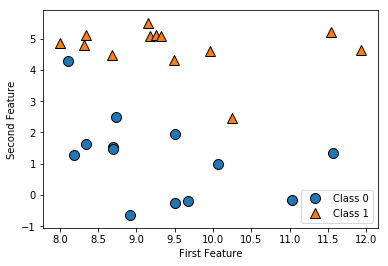

In [100]:
# Plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape: \n{}".format(X.shape))

As you can see from `X.shape`, this dataset consists of 26 data points, with 2 features.

To illustrate regression algorithms, we will use the `synthetic wave` dataset from the `mglearn` module.  
The `wave` dataset has a single input feature and a continuous target variable (or *response*) that we want to model.  
The plot created below shows the single feature on the x-axis and the regression target (the output) on the y-axis.  

X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]]
y:
[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.4

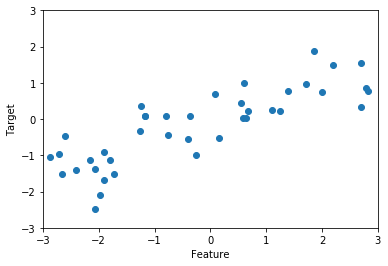

In [101]:
X, y = mglearn.datasets.make_wave(n_samples=40)
print("X:")
print(X)
print("y:")
print(y)
plt.plot(X, y, 'o')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

We are using these very simple, low-dimensional datasets because we can easily visualize them.

We will complement these small synthetic datasets with two real-world datasets that are included in `scikit-learn`.  
One is the [Wisconsin Breast Cancer dataset](http://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-database) (aka `cancer`), which records clinical measurements of breast cancer tumors.  
Each tumor is labeled as "benign" or "malignant", and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.  
The data can be loaded using the `load_breast_cancer` function from `scikit-learn`:

In [102]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [103]:
display(cancer)

{'DESCR': 'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 i

**Note**  
Datasets that are included in `scikit-learn` are usually stored as [Bunch objects](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/base.py), which contain some information about the dataset as well as the actual data.  
The most important thing to know about `Bunch` objects is that they behave like Python dictionaries, with the added benefit of accessing values using a dot (as in `bunch.key` instead of `bunch['key']`).

The dataset consists of 569 data points, with 30 features each:

In [104]:
print("Shape of cancer data: \n{}".format(cancer.data.shape))

Shape of cancer data: 
(569, 30)


Of these 569 data points, 212 are labeled as malignant and 357 as benign:

In [105]:
print("Sample counts per class: \n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


To get a description of the semantic meaning of each feature, we can have a look at the `feature_names` attribute:

In [106]:
print ("Feature names: \n{}".format(cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


You can find out more about the data by reading `cancer.DESCR` if you are interested.

In [107]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

We will also be using a real-world regression dataset, the [Boston Housing dataset](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).  
The task associated with this dataset is to predict the median value of homes in several Boston neighborhoods in the 1970's by using information such as crime rate, proximity to the Charles River, highway accessibility, and so on.  
The dataset contains 506 data points which are described by 13 features:

In [108]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: \n{}".format(boston.data.shape))

Data shape: 
(506, 13)


In [109]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

For our purposes here, we will actually expand this dataset by not only considering these 13 measurements as input features, but also looking at all products (also called *interactions*) between features.  
In other words, we will not only consider crime rate and highway accessibility as features, but also the product of crime rate and highway accessibility.  
Including derived features like these is called [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering), which will be discussed in more detail in Chapter 4.  
This derived dataset can be loaded using the `load_extended_boston` function:

In [110]:
X, y = mglearn.datasets.load_extended_boston()
print("X:")
print(X)
print("y:")
print(y)
print("X.shape: \n{}".format(X.shape))

X:
[[  0.00000000e+00   1.80000000e-01   6.78152493e-02 ...,   1.00000000e+00
    8.96799117e-02   8.04248656e-03]
 [  2.35922539e-04   0.00000000e+00   2.42302053e-01 ...,   1.00000000e+00
    2.04470199e-01   4.18080621e-02]
 [  2.35697744e-04   0.00000000e+00   2.42302053e-01 ...,   9.79579831e-01
    6.28144504e-02   4.02790570e-03]
 ..., 
 [  6.11892474e-04   0.00000000e+00   4.20454545e-01 ...,   1.00000000e+00
    1.07891832e-01   1.16406475e-02]
 [  1.16072990e-03   0.00000000e+00   4.20454545e-01 ...,   9.82676920e-01
    1.29930407e-01   1.71795127e-02]
 [  4.61841693e-04   0.00000000e+00   4.20454545e-01 ...,   1.00000000e+00
    1.69701987e-01   2.87987643e-02]]
y:
[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20

The resulting 104 features are the 13 original features together with the 91 possible combinations of two features within those 13.  
We will use the above datasets to explain and illustrate the properties of the different machine learning algorithms.  
But for now, let's get to the algorithms themselves.  
First, we'll revisit the `k`-nearest neighbors (KNN) algorithm that we saw in the previous chapter.

### k-Nearest Neighbors